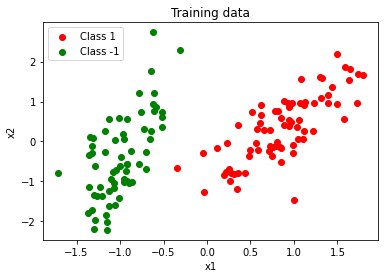

In [2]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

plt.title('Training data')
plt.scatter(xtrain[ytrain==1,0], xtrain[ytrain==1,1], c='r', label='Class 1')
plt.scatter(xtrain[ytrain==-1,0], xtrain[ytrain==-1,1], c='g', label='Class -1')
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.show()



In [4]:
from SGD import *

sgd = SGD(learning_rate=0.05)
sgd.train(xtrain, ytrain, 100)


Epoch: 0. Total error: 49.9262194841816
Epoch: 1. Total error: 33.06862068764402
Epoch: 2. Total error: 32.92486683183053
Epoch: 3. Total error: 32.92304519871525
Epoch: 4. Total error: 32.923021975224074
Epoch: 5. Total error: 32.92302167913443
Epoch: 6. Total error: 32.92302167535943
Epoch: 7. Total error: 32.92302167531127
Epoch: 8. Total error: 32.92302167531065
Epoch: 9. Total error: 32.92302167531065
Epoch: 10. Total error: 32.92302167531065
Epoch: 11. Total error: 32.92302167531065
Epoch: 12. Total error: 32.92302167531065
Epoch: 13. Total error: 32.92302167531065
Epoch: 14. Total error: 32.92302167531065
Epoch: 15. Total error: 32.92302167531065
Epoch: 16. Total error: 32.92302167531065
Epoch: 17. Total error: 32.92302167531065
Epoch: 18. Total error: 32.92302167531065
Epoch: 19. Total error: 32.92302167531065
Epoch: 20. Total error: 32.92302167531065
Epoch: 21. Total error: 32.92302167531065
Epoch: 22. Total error: 32.92302167531065
Epoch: 23. Total error: 32.92302167531065
Ep